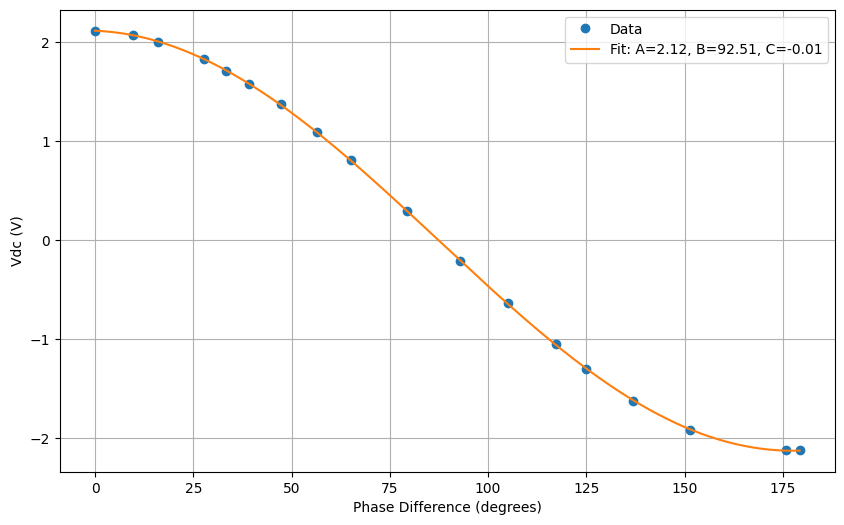

Fitted parameters: A = 2.12, B = 1.61 radians (92.51 degrees), C = -0.01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据，注意角度转换为弧度
phase_diff_deg = np.array([0, 9.61, 16.1, 27.63, 33.44, 39.1, 47.2, 56.5, 65.11, 79.3, 92.9, 105.02, 117.41, 124.9, 137.0, 151.30, 175.8, 179.25])
phase_diff_rad = np.deg2rad(phase_diff_deg)
Vdc = np.array([2.11, 2.07, 2.00, 1.83, 1.71, 1.57, 1.37, 1.09, 0.81, 0.29, -0.21, -0.64, -1.05, -1.30, -1.63, -1.92, -2.12, -2.12])

# 定义拟合函数
def sin_func(x, A, B, C):
    return A * np.sin(x + B) + C

# 初始参数估计
A_guess = (max(Vdc) - min(Vdc)) / 2  # 幅度估计
B_guess = 0  # 相位偏移估计
C_guess = np.mean(Vdc)  # 垂直偏移估计

# 使用curve_fit进行拟合
popt, pcov = curve_fit(sin_func, phase_diff_rad, Vdc, p0=[A_guess, B_guess, C_guess])

# 提取拟合参数
A_fit, B_fit, C_fit = popt

# 计算拟合曲线
phase_diff_rad_smooth = np.linspace(min(phase_diff_rad), max(phase_diff_rad), 500)
Vdc_fit = sin_func(phase_diff_rad_smooth, A_fit, B_fit, C_fit)

# 转换B_fit为角度
B_fit_deg = np.degrees(B_fit)

# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.plot(phase_diff_deg, Vdc, 'o', label='Data')
plt.plot(np.degrees(phase_diff_rad_smooth), Vdc_fit, '-', label=f'Fit: A={A_fit:.2f}, B={B_fit_deg:.2f}, C={C_fit:.2f}')
plt.xlabel('Phase Difference (degrees)')
plt.ylabel('Vdc (V)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: A = {A_fit:.2f}, B = {B_fit:.2f} radians ({B_fit_deg:.2f} degrees), C = {C_fit:.2f}")

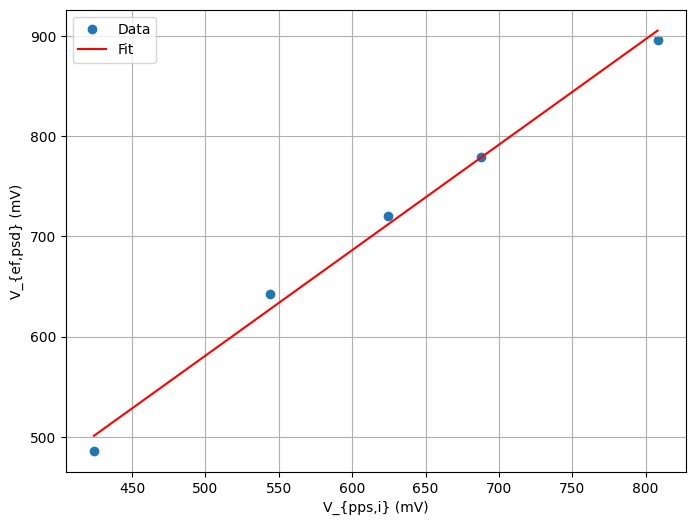

Fitted equation: V_pppsd = 1.0522 * V_ppsi + 54.8517


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data from the table
v_ppsi = np.array([808.14, 688.12, 624.11, 544.10, 424.07])
v_pppsd = np.array([447.88, 389.46, 360.25, 321.3, 243.15])
v_efpsd = 2 * v_pppsd
# Define the function for fitting (linear in this case)
def linear_func(x, a, b):
    return a * x + b

# Perform the curve fit
popt, pcov = curve_fit(linear_func, v_ppsi, v_efpsd)

# Extract fitted parameters
a, b = popt

# Generate points for the fitted line
v_fit = np.linspace(v_ppsi.min(), v_ppsi.max(), 100)
v_efpsd_fit = linear_func(v_fit, a, b)


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(v_ppsi, v_efpsd, label="Data")
plt.plot(v_fit, v_efpsd_fit, 'r-', label="Fit")

plt.xlabel("V_{pps,i} (mV)")
plt.ylabel("V_{ef,psd} (mV)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted equation: V_pppsd = {a:.4f} * V_ppsi + {b:.4f}")

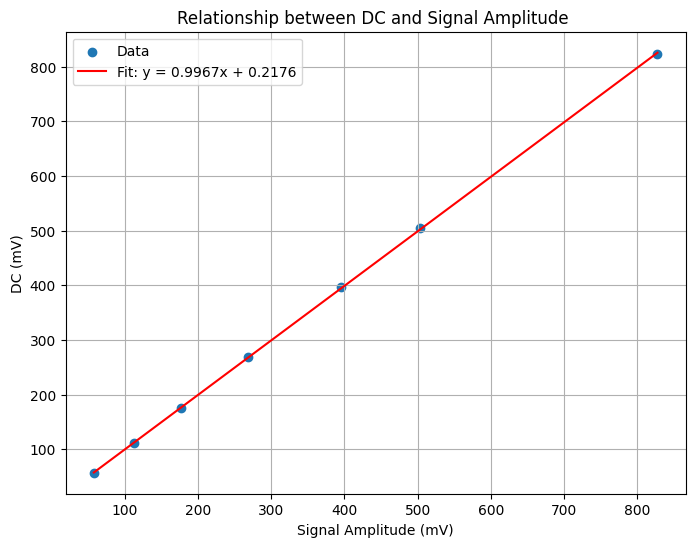

Fitted equation: Udc = 0.9967 * Signal Amplitude + 0.2176


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data from the table
udc = np.array([57, 110.9, 175.3, 269, 396, 504, 824])
signal_amplitude = np.array([57.4, 111.9, 177.1, 268, 396, 504, 828])

# Define the function for fitting (linear in this case)
def linear_func(x, a, b):
    return a * x + b

# Perform the curve fit
popt, pcov = curve_fit(linear_func, signal_amplitude, udc)

# Extract fitted parameters
a, b = popt

# Generate points for the fitted line
signal_fit = np.linspace(signal_amplitude.min(), signal_amplitude.max(), 100)
udc_fit = linear_func(signal_fit, a, b)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(signal_amplitude, udc, label="Data")
plt.plot(signal_fit, udc_fit, 'r-', label=f"Fit: y = {a:.4f}x + {b:.4f}")

plt.xlabel("Signal Amplitude (mV)")
plt.ylabel("DC (mV)")
plt.title("Relationship between DC and Signal Amplitude ")
plt.legend()
plt.grid(True)
plt.savefig("fitted_plot.png") # Save the plot to a file
plt.show()

print(f"Fitted equation: Udc = {a:.4f} * Signal Amplitude + {b:.4f}")

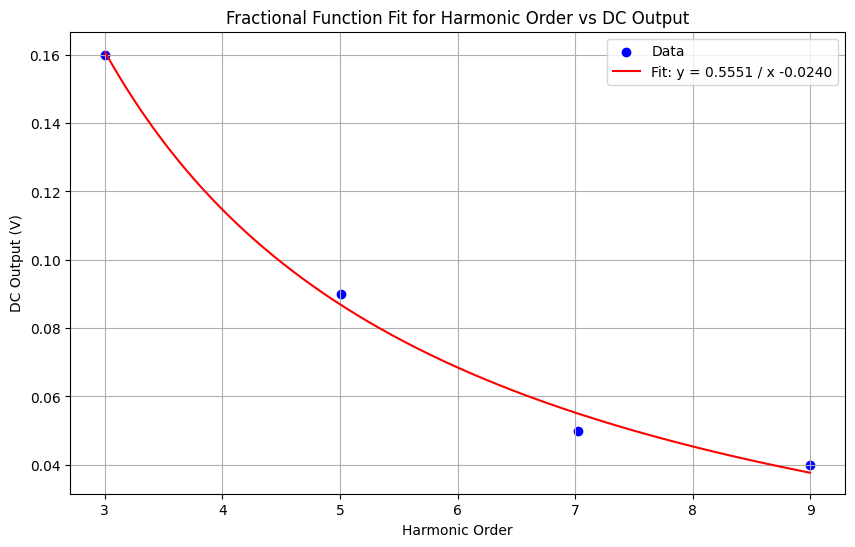

Fitted equation: y = 0.5551 / x  -0.0240


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# 数据
f0 = 199.87
f = np.array([600.93,1001.9,1404,1798])
harmonic_order = f / f0
dc_output = np.array([0.16,0.09,0.05,0.04])

# 定义分数函数
def fractional_func(x, a, c):
    return (a / x) + c

# 使用curve_fit进行拟合
popt, pcov = curve_fit(fractional_func, harmonic_order, dc_output, p0=[1, 0])

# 提取拟合参数
a_fit, c_fit = popt

# 生成拟合曲线
harmonic_order_fit = np.linspace(min(harmonic_order), max(harmonic_order), 500)
dc_output_fit = fractional_func(harmonic_order_fit, a_fit, c_fit)

# 绘制原始数据和拟合曲线
plt.figure(figsize=(10, 6))
plt.scatter(harmonic_order, dc_output, label="Data", color="blue")
plt.plot(harmonic_order_fit, dc_output_fit, 'r-', label=f"Fit: y = {a_fit:.4f} / x {c_fit:.4f}")

plt.xlabel("Harmonic Order")
plt.ylabel("DC Output (V)")
plt.title("Fractional Function Fit for Harmonic Order vs DC Output")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted equation: y = {a_fit:.4f} / x  {c_fit:.4f}")